In [1]:
import numpy as np
from qutip import *

from paper_data import Omega, Delta, get_hamiltonian_coeff_fn
from simulation.time_dependent_hamiltonian import get_td_hamiltonian, get_exp_list
from states import get_ground_states, get_ghz_state, get_states, get_label_from_state


In [2]:
L = 4

psi_0 = tensor(get_ground_states(L))

t_list = np.linspace(0, 1.1e-6, 1000)


In [3]:

get_Omega = get_hamiltonian_coeff_fn(Omega, L)
get_Delta = get_hamiltonian_coeff_fn(Delta, L)

In [4]:
H = get_td_hamiltonian(L, get_Omega, get_Delta)
result = mesolve(H, psi_0, t_list, e_ops=get_exp_list(L)[2], options=Options(store_states=True))
s = result.states[-1]


no collapse operator, using sesolve


In [5]:
ghz = get_ghz_state(L)


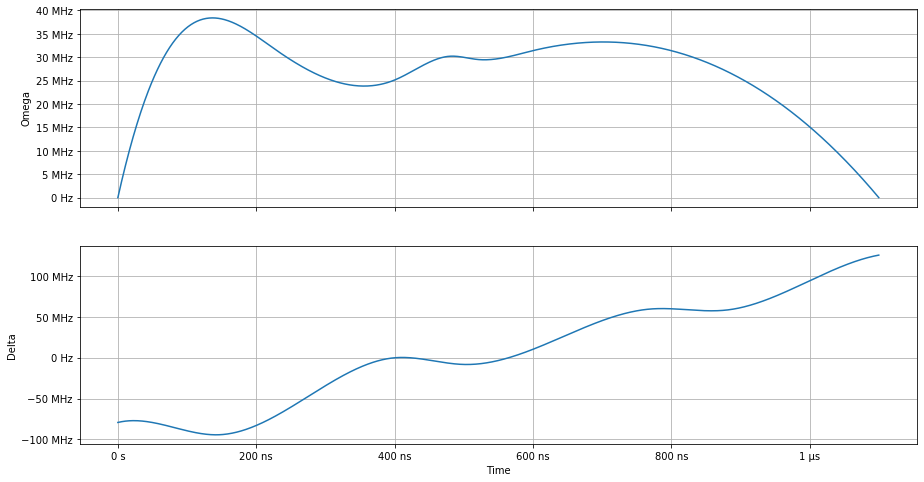

In [6]:
import matplotlib.pyplot as plt
from matplotlib import ticker

fig, axs = plt.subplots(2, 1, sharex='all', figsize=(15, 8))
plt.xlabel('Time')

ax0 = axs[0]
ax0.plot(t_list, [get_Omega(t) for t in t_list])
ax0.set_ylabel("Omega")
ax0.yaxis.set_major_formatter(ticker.EngFormatter('Hz'))

ax1 = axs[1]
ax1.plot(t_list, [get_Delta(t) for t in t_list])
ax1.set_ylabel("Delta")
ax1.yaxis.set_major_formatter(ticker.EngFormatter('Hz'))

ax0.xaxis.set_major_formatter(ticker.EngFormatter('s'))

for ax in axs:
    ax.grid()


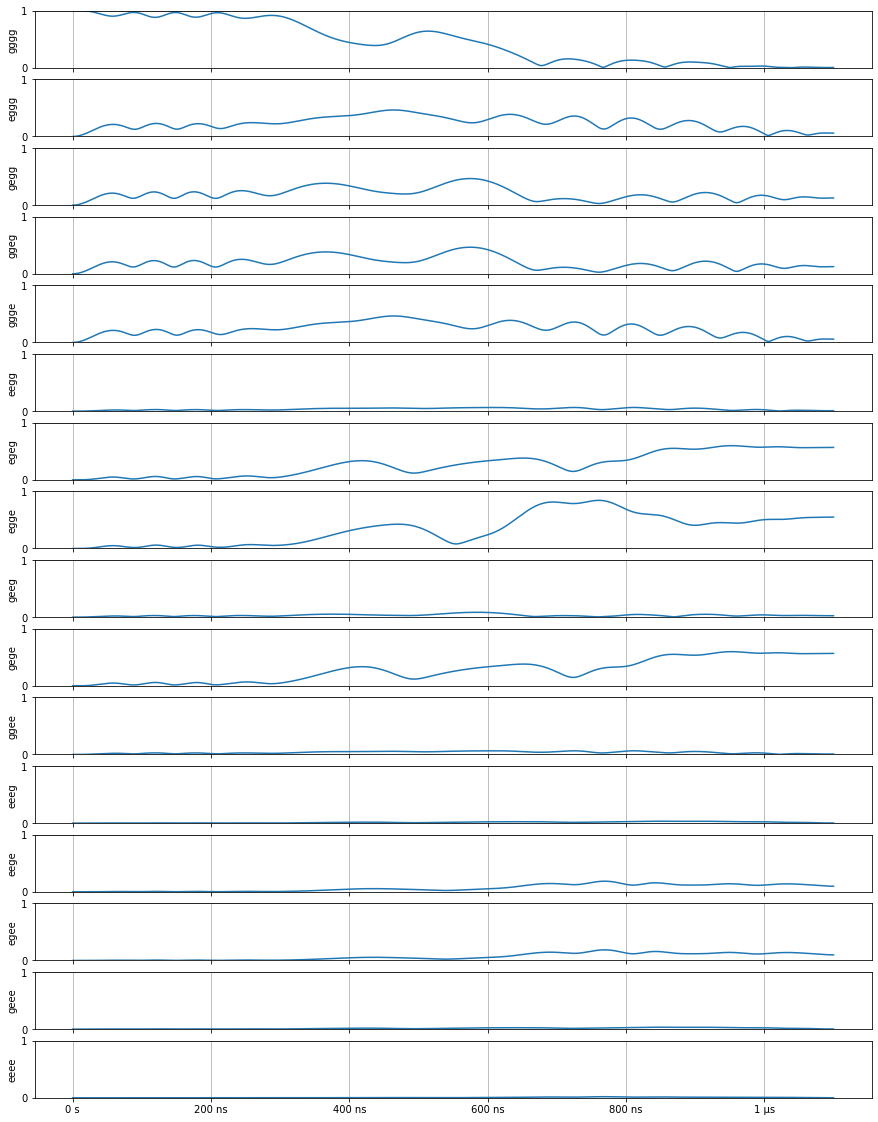

In [7]:
states = get_states(L)
fig, axs = plt.subplots(len(states), 1, sharex='all', figsize=(15, 20))

for i, state in enumerate(states):
    ax = axs[i]
    ax.plot(t_list, [fidelity(tensor(state), _instantaneous_state) for _instantaneous_state in result.states])
    label = get_label_from_state(state)
    ax.set_ylabel(label)
    ax.set_ylim((0, 1))
    ax.yaxis.set_ticks([0, 1])
    ax.grid()
    
axs[0].xaxis.set_major_formatter(ticker.EngFormatter('s'))

